C:\Users\belgr\anaconda3\envs\Portfolio\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\belgr\anaconda3\envs\Portfolio\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Root Mean Squared Error (RMSE): 1.01°F
✅ Feature importance plot saved
✅ Clustered plot saved


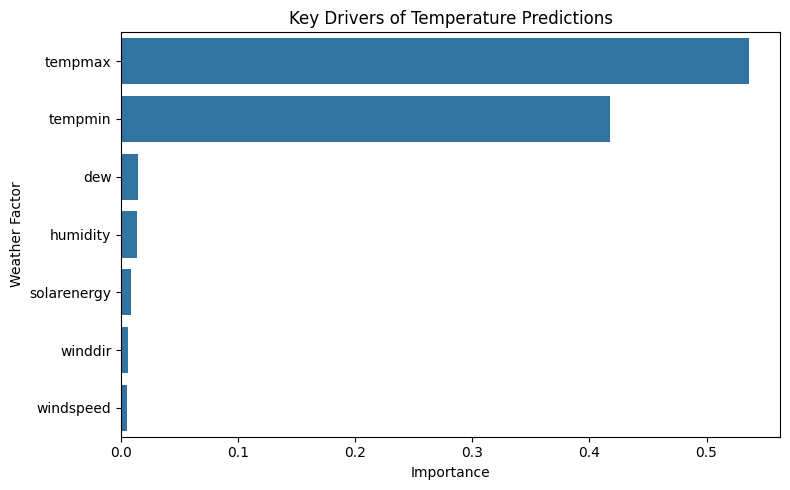

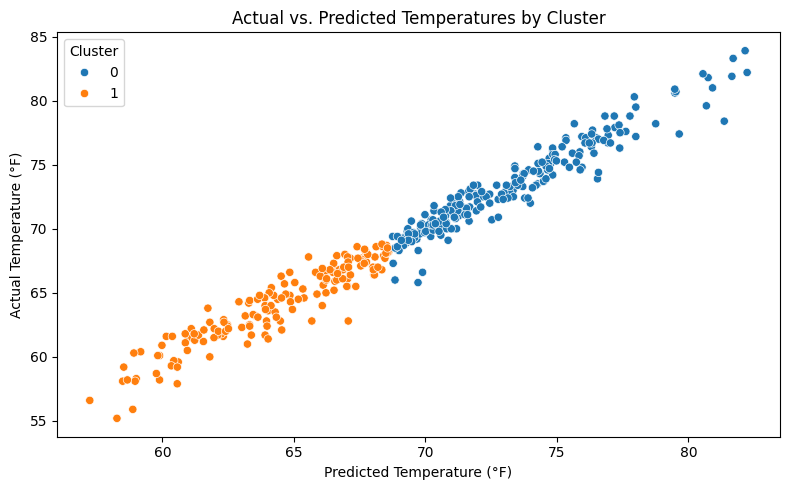

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load and clean data
weather_total = pd.read_csv("../data/weather_total.csv", parse_dates=["datetime"])
weather_total.dropna(inplace=True)
# Clean temperature outliers (e.g., 6257.1 -> 62.57°F)
weather_total["temp"] = weather_total["temp"].apply(lambda x: x / 100 if x > 200 else x)
weather_total.to_csv("../data/weather_total_cleaned.csv", index=False)

# Model training
X = weather_total.drop(columns=["datetime", "temp"])
y = weather_total["temp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
model = RandomForestRegressor(random_state=123)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}°F")

# Feature Importance Plot
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Key Drivers of Temperature Predictions")
plt.xlabel("Importance")
plt.ylabel("Weather Factor")
plt.tight_layout()
plt.savefig("../Reports/Images/feature_importance_plot.png")
print("✅ Feature importance plot saved")

# Clustered Forecasts Plot
cluster_df = pd.DataFrame({
    "Actual": pd.to_numeric(y_test.reset_index(drop=True), errors="coerce"),
    "Predicted": pd.to_numeric(pd.Series(predictions), errors="coerce")
}).dropna()
scaled_preds = StandardScaler().fit_transform(cluster_df["Predicted"].values.reshape(-1, 1))
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_df["Cluster"] = kmeans.fit_predict(scaled_preds).astype(str)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=cluster_df, x="Predicted", y="Actual", hue="Cluster", palette="tab10")
plt.title("Actual vs. Predicted Temperatures by Cluster")
plt.xlabel("Predicted Temperature (°F)")
plt.ylabel("Actual Temperature (°F)")
plt.tight_layout()
plt.savefig("../Reports/Images/clustered_plot.png")
print("✅ Clustered plot saved")